In [1]:
%load_ext autoreload
%autoreload 2

import ast
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from Classes.Artifact import Artifact
from Classes.Artist import Artist
from Classes.Collection import Collection
from Classes.ArtifactRoman import ArtifactRoman
from Classes.ArtifactGreek import ArtifactGreek
from Classes.utils import visualize_rdf_graph

In [2]:
df = pd.read_csv("../Data/MetObjects_Cleaned.csv", low_memory=False)

In [3]:
df.head()

,Unnamed: 0,Object ID,Department,AccessionYear,Object Name,Title,Culture,Period,Medium,Classification,...,Tags,Tags AAT URL,Tags Wikidata URL,Artist Display Name,Artist Wikidata URL,Artist ULAN URL,Artist Nationality,Dimensions,first_cm_raw,cm_value
0,139012,239584,Greek and Roman Art,1870-01-01,"Sarcophagus, garland",Marble sarcophagus with garlands,Roman,Severan,"Marble, Proconnesian",Stone Sculpture,...,"['Animals', 'Garlands', 'Hunting', 'Medusa']","['http://vocab.getty.edu/page/aat/300249525', ...","['https://www.wikidata.org/wiki/Q729', 'https:...",NaN,NaN,NaN,NaN,Overall: 53 x 88in. (134.6 x 223.5cm) ...,134.6 x 223.5cm,NaN
1,139013,239585,Greek and Roman Art,1874-01-01,Pendant in the form of a vase,Pendant in the form of a vase,Greek,Classical,Gold,Gold and Silver,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other: 9/16 in. (1.4 cm),1.4 cm,1.4
2,139014,239586,Greek and Roman Art,1874-01-01,Bead,Glass bead,Greek,Hellenistic,Glass,Glass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L.: 1 in. (2.4 cm)\r\nDiam.: 3/8 in. (1.0 cm),2.4 cm,2.4
3,139015,239587,Greek and Roman Art,1874-01-01,Perfume bottle,Glass perfume bottle,"Roman, Cypriot",Mid Imperial,Glass,Glass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6 5/8in. (16.8cm)\r\nOther: 3 5/8in. (9.2cm)\r...,16.8cm,16.8
4,139016,239588,Greek and Roman Art,1874-01-01,Bead,Glass eye bead,"Phoenician, Cypriot",Archaic or Classical,Glass,Glass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L.: 3/8 in. (1 cm)\r\nDiam.: 15/16 in. (0.9 cm),1 cm,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33726 entries, 0 to 33725
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           33726 non-null  int64  
 1   Object ID            33726 non-null  int64  
 2   Department           33726 non-null  object 
 3   AccessionYear        33505 non-null  object 
 4   Object Name          33691 non-null  object 
 5   Title                33726 non-null  object 
 6   Culture              32410 non-null  object 
 7   Period               29900 non-null  object 
 8   Medium               33710 non-null  object 
 9   Classification       33696 non-null  object 
 10  Credit Line          33716 non-null  object 
 11  Object Wikidata URL  7564 non-null   object 
 12  Tags                 5664 non-null   object 
 13  Tags AAT URL         5664 non-null   object 
 14  Tags Wikidata URL    5664 non-null   object 
 15  Artist Display Name  2145 non-null  

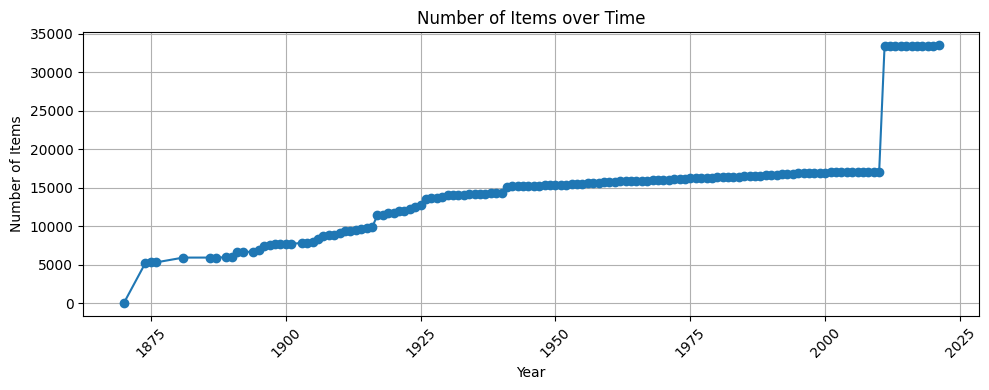

In [5]:
df['AccessionYear'] = pd.to_datetime(df['AccessionYear'], errors='coerce')

date_counts = df['AccessionYear'].value_counts().sort_index()
cumulative_counts = date_counts.cumsum()

# Plot
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(cumulative_counts.index, cumulative_counts.values, marker='o')
ax.set_title('Number of Items over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Items')
ax.grid(True)

# Set x-axis ticks every 100 years
ax.xaxis.set_major_locator(mdates.YearLocator(25))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

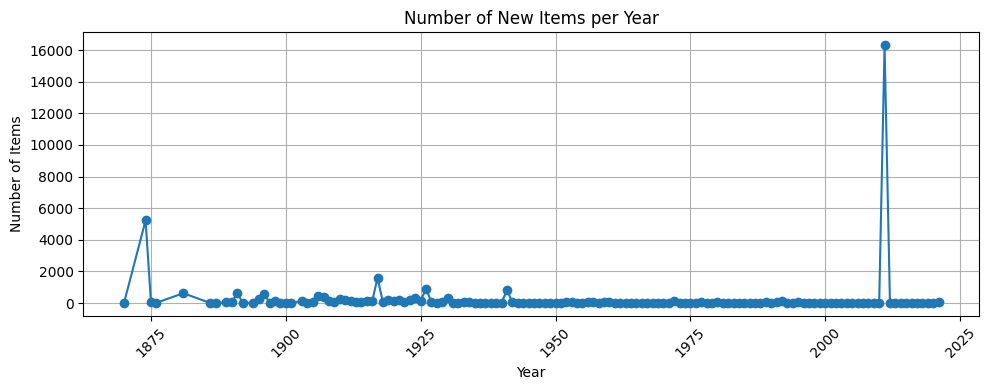

In [19]:
year_counts = df['AccessionYear'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(year_counts.index, year_counts.values, marker='o')
ax.set_title('Number of New Items per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Items')
ax.grid(True)

ax.xaxis.set_major_locator(mdates.YearLocator(25))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

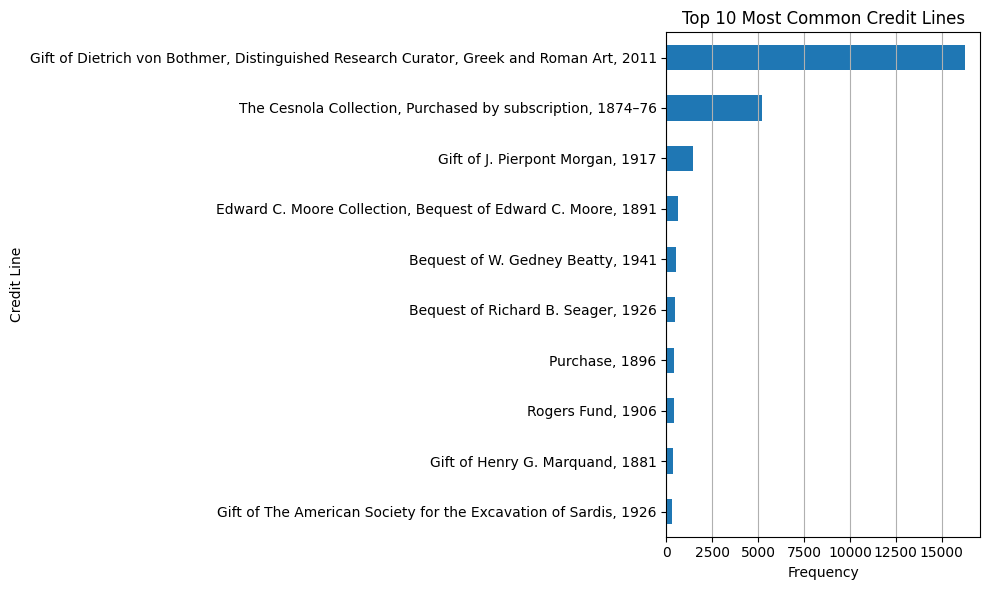

In [7]:
top_items = df['Credit Line'].value_counts().head(10)

top_items.sort_values().plot(kind='barh', figsize=(10, 6))  # sort so smallest at top
plt.title('Top 10 Most Common Credit Lines')
plt.xlabel('Frequency')
plt.ylabel('Credit Line')
plt.tight_layout()
plt.grid(axis='x')
plt.show()

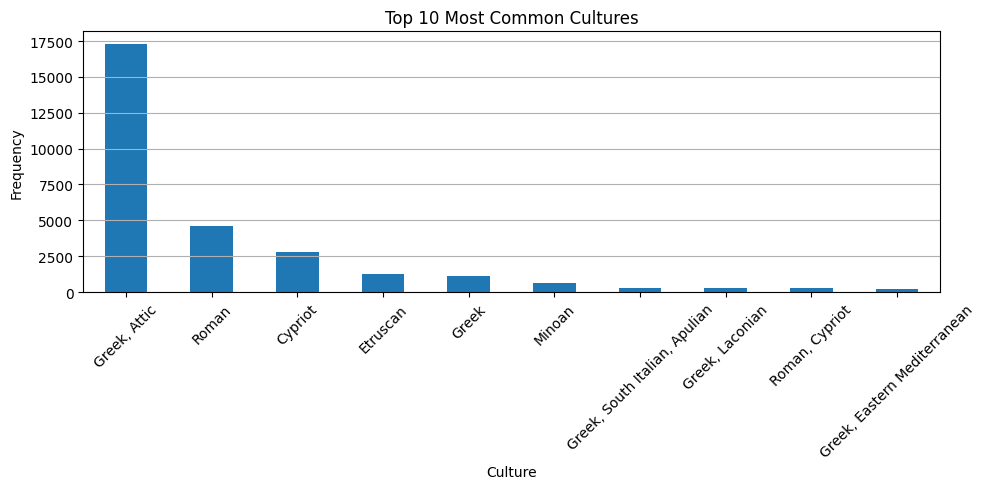

In [8]:
top_items = df['Culture'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 5))
top_items.plot(kind='bar')
plt.title('Top 10 Most Common Cultures')
plt.xlabel('Culture')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

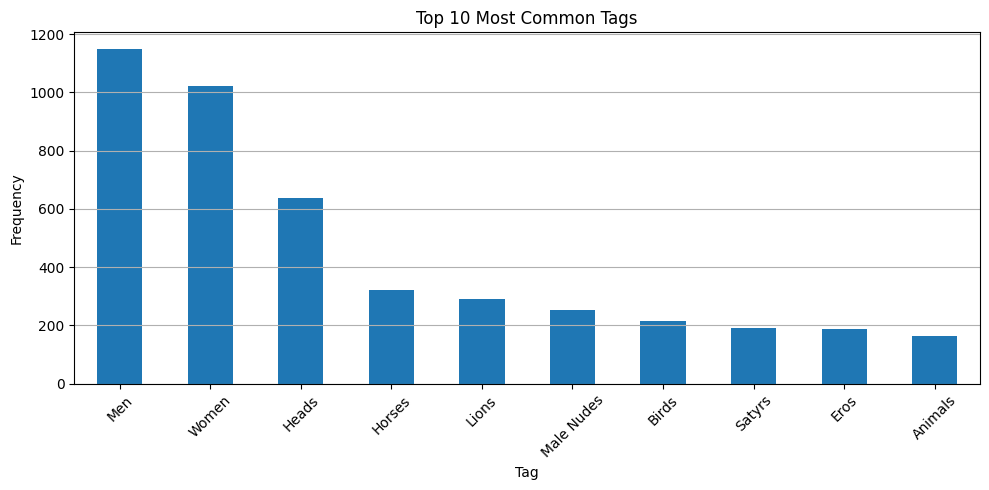

In [9]:
def safe_literal_eval(x):
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return []

df['Tags'] = df['Tags'].apply(safe_literal_eval)

top_items = df.explode("Tags")["Tags"].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 5))
top_items.plot(kind='bar')
plt.title('Top 10 Most Common Tags')
plt.xlabel('Tag')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

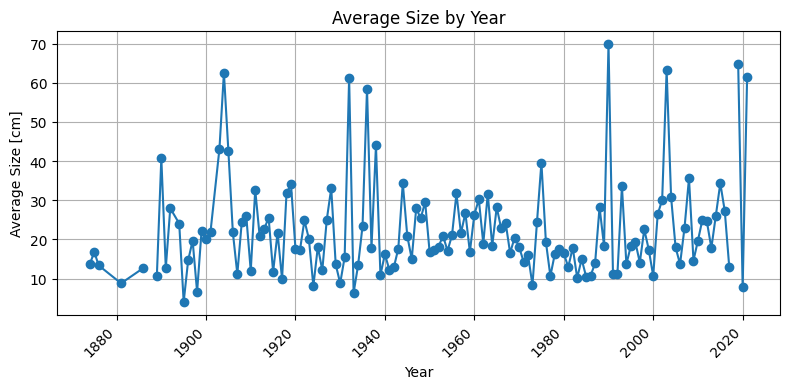

In [10]:
yearly_avg = df.groupby('AccessionYear')['cm_value'].mean()

# Plot
plt.figure(figsize=(8, 4))
yearly_avg.plot(marker='o')
plt.title('Average Size by Year')
plt.xlabel('Year')
plt.ylabel('Average Size [cm]')
plt.grid(True)
# Set x-axis ticks every 100 years
ax.xaxis.set_major_locator(mdates.YearLocator(25))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

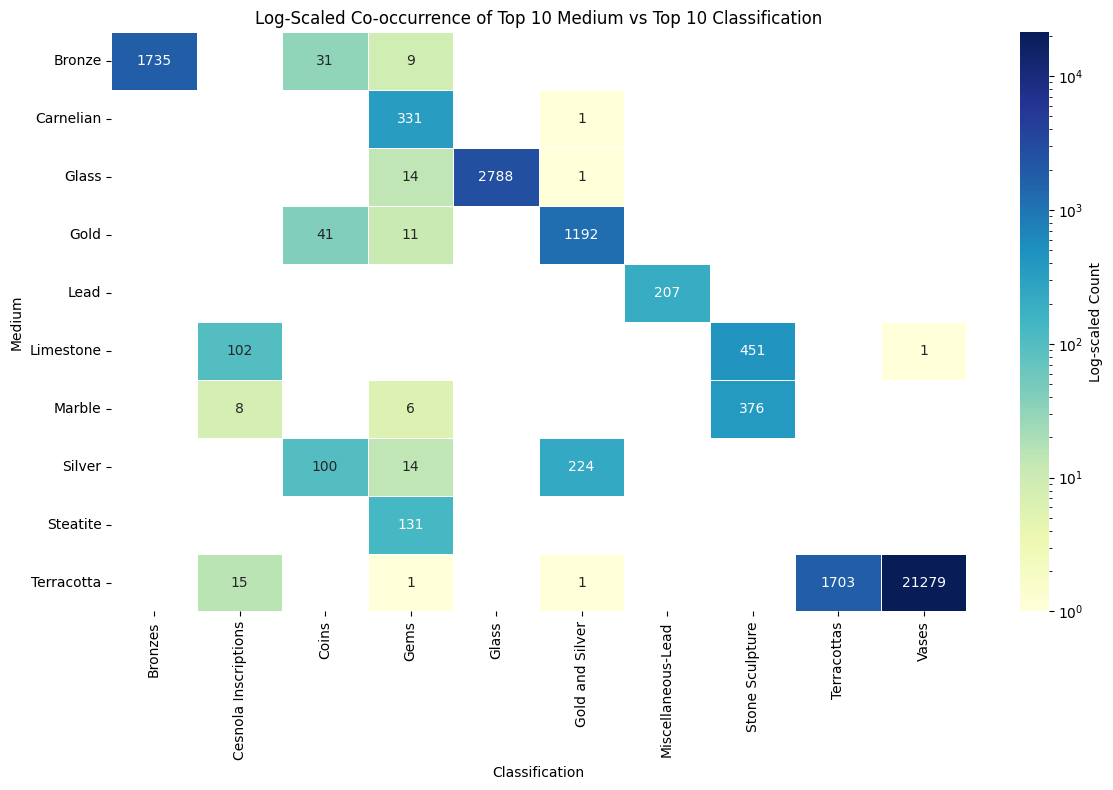

In [11]:
from matplotlib.colors import LogNorm

col_x = 'Classification'
col_y = 'Medium'

top_x = df[col_x].value_counts().nlargest(10).index
top_y = df[col_y].value_counts().nlargest(10).index

filtered_df = df[df[col_x].isin(top_x) & df[col_y].isin(top_y)]

co_occurrence = pd.crosstab(filtered_df[col_y], filtered_df[col_x])

plt.figure(figsize=(12, 8))
sns.heatmap(
    co_occurrence,
    cmap='YlGnBu',
    linewidths=0.5,
    norm=LogNorm(vmin=co_occurrence[co_occurrence > 0].min().min(), vmax=co_occurrence.max().max()),
    cbar_kws={"label": "Log-scaled Count"},
    annot=True,
    fmt='d'
)
plt.title(f'Log-Scaled Co-occurrence of Top 10 {col_y} vs Top 10 {col_x}')
plt.xlabel(col_x)
plt.ylabel(col_y)
plt.tight_layout()
plt.show()

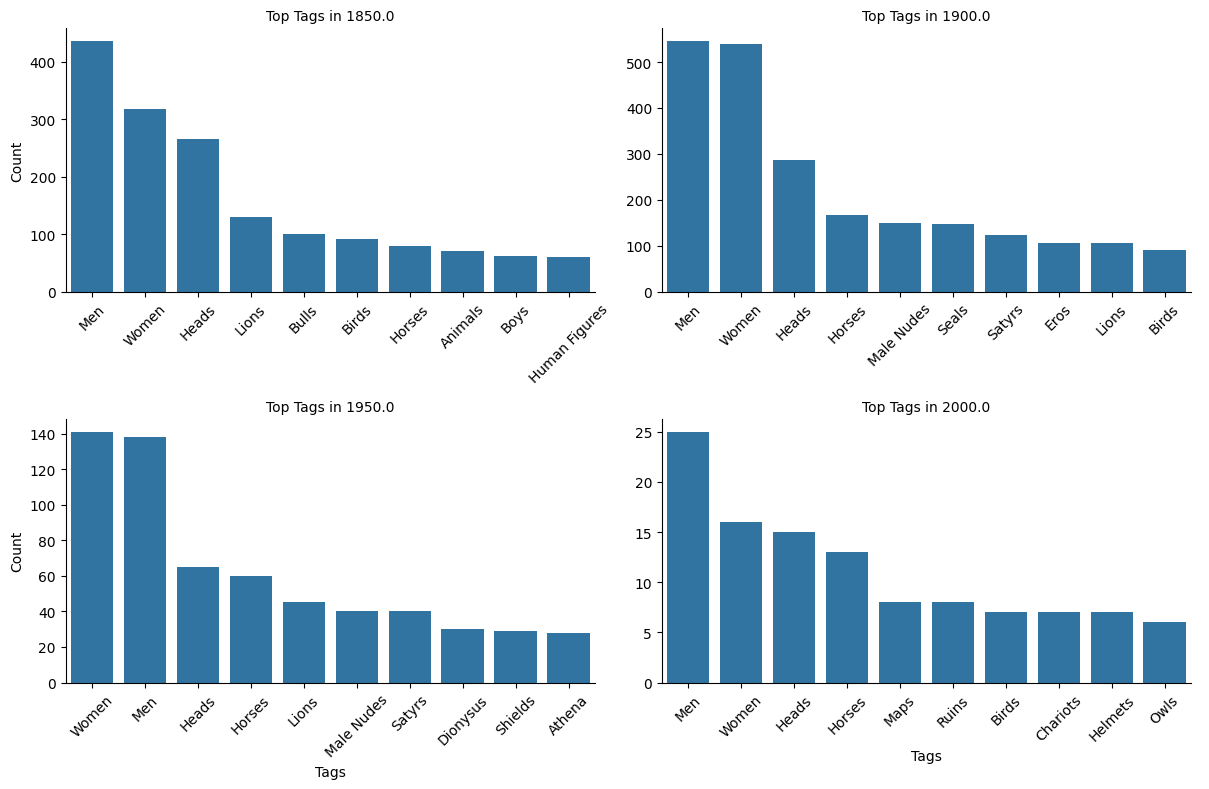

In [ ]:
df['AccessionYear'] = pd.to_datetime(df['AccessionYear'], errors='coerce')

df['Year'] = df['AccessionYear'].dt.year

df['YearBin'] = (df['Year'] // 50) * 50

exploded = df.explode('Tags')

exploded = exploded.dropna(subset=['Tags'])

top_tags_by_bin = (
    exploded.groupby('YearBin')['Tags']
    .value_counts()
    .groupby('YearBin')
    .head(10)
    .reset_index(name='Count')
)


g = sns.catplot(
    data=top_tags_by_bin,
    x='Tags', y='Count', col='YearBin',
    kind='bar', col_wrap=2,
    height=4, aspect=1.5,
    sharex=False, sharey=False
)
g.set_titles("Top Tags in {col_name}")
g.set_xticklabels(rotation=45)
plt.tight_layout()
plt.show()